In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from MdpLibs.MdpOptimizer import optimizeMixedTimePolicy, visualizeUtilityTable
from MdpLibs import encode_float_filename

In [10]:
mdp_params = {}
mdp_params['LEN_horizon'] = 50
mdp_params['AoS_th'] = 5
mdp_params['gamma'] = 2.5
mdp_params['N_Ax'] = 20
mdp_params['N_Ay'] = 10
mdp_params['max_Ax'] = 500
mdp_params['max_Ay'] = 300
mdp_params['max_cost_x'] = 1
mdp_params['max_cost_y'] = 1.1
mdp_params['utility_ref'] = 0.99
mdp_params['utility_weight'] = 0.001
mdp_params['budget_discount'] = 0.3
mdp_params['B'] = mdp_params['max_cost_x']*mdp_params['LEN_horizon']*mdp_params['N_Ax']*mdp_params['budget_discount']
#Normalize cost by budget
mdp_params['max_cost_x'] = mdp_params['max_cost_x']/mdp_params['B']
mdp_params['max_cost_y'] = mdp_params['max_cost_y']/mdp_params['B']
    
#----Learning Params----
trainPrams = {
    'accumulation_steps':2,
    'lagrange_lambda':80,
    'lr_lambda':2.5,
    'N_iter':10000,
    'lambda_reset_threshold':0.75
}

forward:fixed(0.01):10->2
Step 0, J=112.6332015991211, J_r=32.5655632019043, J_c=2.4087605476379395, lambda:80
Step 1000, J=25.498836517333984, J_r=44.200538635253906, J_c=1.099422812461853, lambda:6.182458251714706
Step 2000, J=44.448387145996094, J_r=42.2210693359375, J_c=0.9141877889633179, lambda:51.05702146887779
Step 3000, J=20.49846649169922, J_r=40.99693298339844, J_c=0.8673386573791504, lambda:0.0
Step 4000, J=18.703868865966797, J_r=37.407737731933594, J_c=0.9593037366867065, lambda:0.0
Step 5000, J=18.50115966796875, J_r=37.0023193359375, J_c=0.9757481813430786, lambda:0.0
Step 6000, J=25.829559326171875, J_r=35.281803131103516, J_c=1.0567195415496826, lambda:15.49826055765152
Step 7000, J=34.73127746582031, J_r=35.56597900390625, J_c=1.0134689807891846, lambda:33.446092158555984
Step 8000, J=37.275543212890625, J_r=35.87720489501953, J_c=0.9953421354293823, lambda:38.85486148297787
Step 9000, J=34.21104049682617, J_r=36.08604431152344, J_c=0.9846419095993042, lambda:32.8403

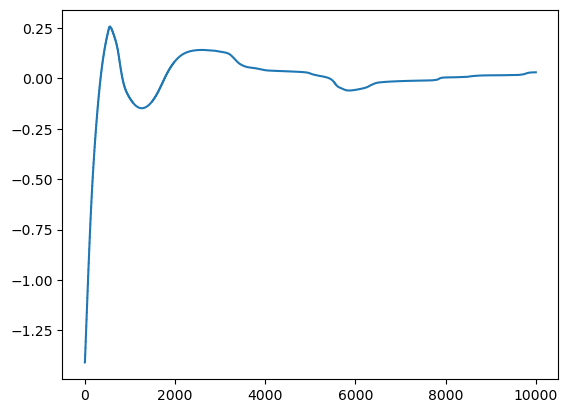

forward:fixed(0.01):10->4
Step 0, J=112.1854476928711, J_r=31.707380294799805, J_c=2.4082939624786377, lambda:80


KeyboardInterrupt: 

In [11]:
lenWindow = 20
direction = "forward"
mode = "fixed"
dbParams = 0.01
#numAggregatedTraffic = 3
markovFolder = f"../part02_build_markov/Results/MarkovModel"

for numAggregatedTraffic in [2,4,5]:
    dbpString = encode_float_filename(dbParams)
    print(f"{direction}:{mode}({dbParams}):{lenWindow}->{numAggregatedTraffic}")
    saveFolder = f"Results/MdpPolicy/{direction}/{mode}_{dbpString}/{lenWindow}"
    savemdpParamFileName = f"{saveFolder}/mdpParams_{lenWindow}_to_{numAggregatedTraffic}.pkl"
    savemdpMdpSolverFileName = f"{saveFolder}/mdpSolver_{lenWindow}_to_{numAggregatedTraffic}.pkl"

    if os.path.exists(savemdpParamFileName) == True:
        print("Existed. Skip")
    else:
        with open(f"{markovFolder}/{direction}/{mode}_{dbpString}/{lenWindow}/{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
            aggregateMarkovModelResults = pickle.load(file)

        mdpSolverTorchOpt, mdpParams, J_history, J_r_history, J_c_history, lambda_history = optimizeMixedTimePolicy(
            aggregateMarkovModelResults, trainPrams, mdpParams=mdp_params, verbose=True)

        policyX, policyY = mdpSolverTorchOpt.fromVariableToPolicy()
        policyX = policyX.cpu().detach().numpy()
        policyY = policyY.cpu().detach().numpy()
        mdpResults = mdpParams
        mdpResults['policyX'] = policyX
        mdpResults['policyY'] = policyY
        
        plt.plot(1 - np.array(J_c_history))
        plt.show()

        if os.path.exists(saveFolder) == False:
            os.makedirs(saveFolder)
        with open(savemdpParamFileName, "wb") as file:
            pickle.dump(mdpResults, file)
        with open(savemdpMdpSolverFileName, "wb") as file:
            pickle.dump(mdpSolverTorchOpt, file)


In [8]:
print(1)

1
